# Homework 02

In [31]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt

## 1 Preperation

In [32]:
#implements the sigmoid, which we use as activation function, and sigmoidprime(its derivative) function
def sigmoid(input):
    return 1/(1+np.exp(-input))

def sigmoidprime(input):
    return sigmoid(input)*(1-sigmoid(input))

## 2 Data Set

In [33]:
# These are the four possible input pairs of (x1,x2).
possible_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

## 3 Perceptron

In [34]:
# perceptron class from the flipped classroom session, changed alpha to 1, the activation funct in 'forward_step' to sigmoid
# and replaced the funct 'training_step' with 'update'
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 0.01.
        self.alpha = 1
        self.drive = 0
        self.inputs = np.array(range(input_units))
        
    def forward_step(self, inputs):
        self.inputs = inputs
        # Perform a perceptron forward step.
        # 1. Calculate the drive
        self.drive =  self.weights @ inputs + self.bias 

        # return the value of the activation function, which is sigmoid
        return sigmoid(self.drive)
    
    '''
    delta: np.array([]) <- Takes the error value for the respective perceptron.
    Uses delta to calculate the lambdas for bias and weights and uses those lambdas to update bias and weights.
    '''
    def update(self, delta):
        lambda_bias = delta * 1
        lambda_weights = delta * self.inputs
        self.bias = self.bias - self.alpha * lambda_bias
        self.weights = self.weights - self.alpha * lambda_weights
        
        

## 4 Multi-Layer Perceptron

In [35]:
# mlp class
class MLP:
    '''
    network_structure = np.array([]) <- Takes in the structure of the network. The first index is the input layer and the
        last index is the output layer. Everything in between are hidden layers. For example: [4,4,1]
    input_units = int <- Takes in the number of binary input units
    '''
    def __init__(self, network_structure, input_units):
        '''
        self.network is a 2D-List of perceptrons where the first dimension represents each layer
        '''
        self.network = []
        for layers in network_structure:
            layer = []
            for point in range(layers):
                perceptron = Perceptron(input_units)
                layer.append(perceptron)
            input_units = len(layer)
            self.network.append(layer)
        
        self.network = np.array(self.network)    
        
    '''
    inputs: np.array([]) <- Takes in the input for each episode. The number of indizes have to be the same as the
        number of input_units taken in on __init__. For example: [0,1]
    Returns an np.array([]) with the results of this step. In case you have one output-perceptron it may return [1]
    '''
    def forward_step(self, inputs):
        for layer in self.network:
            outputs = []
            for perceptron in layer:
                outputs.append(perceptron.forward_step(inputs))
            inputs = np.array(outputs)
            
        return inputs
    
    '''
    output: np.array([]) <- Takes in the actual outputs the MLP generated at the previous forward_step()
    target: np.array([]) <- Takes in the expected target values
    This function updates all perceptrons using the actual and the target values
    '''
    def backprop_step(self, output, target):
        
        deltas = []
        
        '''
        These two for loops calculate the deltas for the output layer and updates all perceptrons in the layer
        '''
        for j in range(len(self.network[-1])):
            deltas.append(-(target[j]-output[j]) * sigmoidprime(self.network[-1][j].drive))
        for i in range(len(deltas)):
            self.network[-1][i].update(deltas[i])

        '''
        This for loop calculates all deltas for corresponding hidden layer and updates all perceptrons accordingly
        '''
        for i in range(len(self.network)-2, -1, -1):
            error = 0.0
            
            for j in range(len(deltas)):
                error += (deltas[j] * self.network[i+1][j].weights)
            
            drives = [k.drive for k in self.network[i]]
            new_delta = error * sigmoidprime(np.array(drives))
            
            for j in range(len(self.network[i])):
                self.network[i][j].update(new_delta[j])
            deltas = new_delta
        

## 5 + 6 Training and Visualization

### For AND gate

In [36]:
t = t_and
mlp = MLP([4,4,1],2)
steps = []
accuracies = []
loss = []
for i in range(1000):
    steps.append(i)
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(possible_inputs)):
        sample = possible_inputs[k]
        target = t[k]
        output = mlp.forward_step(sample)[0]
        mlp.backprop_step(np.array([output]), np.array([target]))
        accuracy_sum += int(round(output) == target)
        loss_sum += pow((target - output), 2)
    accuracies.append(accuracy_sum/4)
    loss.append(loss_sum/4)

#### Accuracy

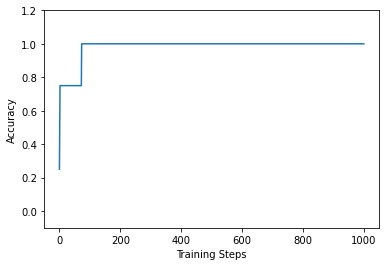

In [37]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Loss

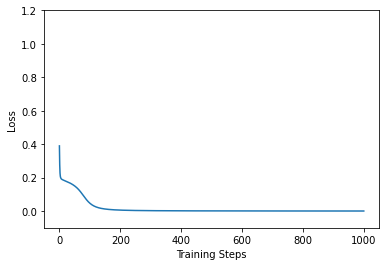

In [38]:
plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

### For OR gate

In [39]:
t = t_or
mlp = MLP([4,4,1],2)
steps = []
accuracies = []
loss = []
for i in range(1000):
    steps.append(i)
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(possible_inputs)):
        sample = possible_inputs[k]
        target = t[k]
        output = mlp.forward_step(sample)[0]
        mlp.backprop_step(np.array([output]), np.array([target]))
        accuracy_sum += int(round(output) == target)
        loss_sum += pow((target - output), 2)
    accuracies.append(accuracy_sum/4)
    loss.append(loss_sum/4)

#### Accuracy

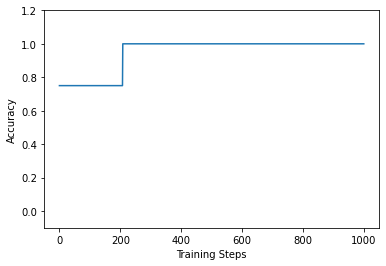

In [40]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Loss

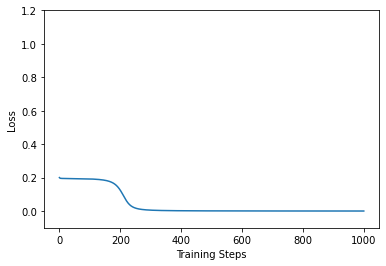

In [41]:
plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

### For NOT AND gate

In [42]:
t = t_nand
mlp = MLP([4,4,1],2)
steps = []
accuracies = []
loss = []
for i in range(1000):
    steps.append(i)
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(possible_inputs)):
        sample = possible_inputs[k]
        target = t[k]
        output = mlp.forward_step(sample)[0]
        mlp.backprop_step(np.array([output]), np.array([target]))
        accuracy_sum += int(round(output) == target)
        loss_sum += pow((target - output), 2)
    accuracies.append(accuracy_sum/4)
    loss.append(loss_sum/4)

#### Accuracy

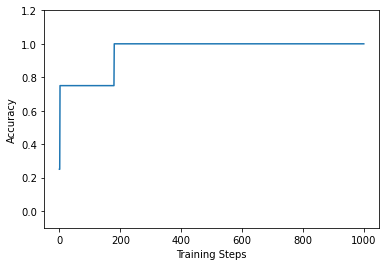

In [43]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Loss

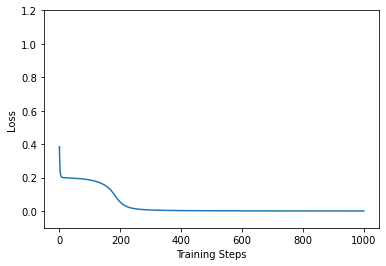

In [44]:
plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

### For NOT OR gate

In [45]:
t = t_nor
mlp = MLP([4,4,1],2)
steps = []
accuracies = []
loss = []
for i in range(1000):
    steps.append(i)
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(possible_inputs)):
        sample = possible_inputs[k]
        target = t[k]
        output = mlp.forward_step(sample)[0]
        mlp.backprop_step(np.array([output]), np.array([target]))
        accuracy_sum += int(round(output) == target)
        loss_sum += pow((target - output), 2)
    accuracies.append(accuracy_sum/4)
    loss.append(loss_sum/4)

#### Accuracy

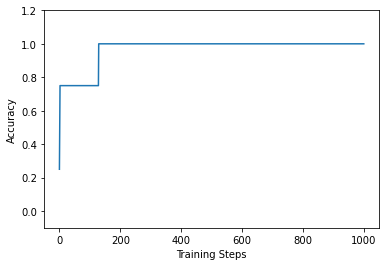

In [46]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Loss

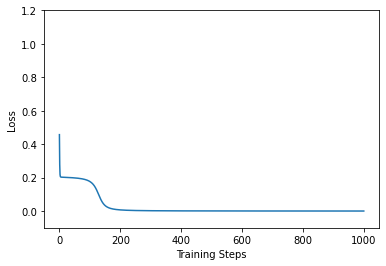

In [47]:
plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

### For XOR  gate

In [48]:
t = t_xor
mlp = MLP([4,4,1],2)
steps = []
accuracies = []
loss = []
for i in range(1000):
    steps.append(i)
    accuracy_sum = 0
    loss_sum = 0
    for k in range(len(possible_inputs)):
        sample = possible_inputs[k]
        target = t[k]
        output = mlp.forward_step(sample)[0]
        mlp.backprop_step(np.array([output]), np.array([target]))
        accuracy_sum += int(round(output) == target)
        loss_sum += pow((target - output), 2)
    accuracies.append(accuracy_sum/4)
    loss.append(loss_sum/4)

#### Accuracy

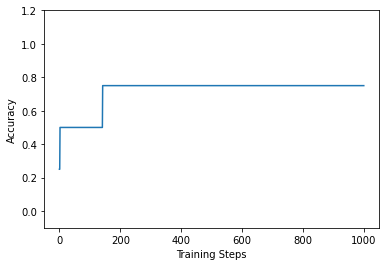

In [49]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Loss

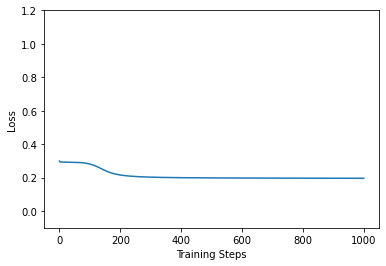

In [50]:
plt.figure()
plt.plot(steps, loss)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()